In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ericl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ericl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ericl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Rule Based Approach Sentiment Analysis

Rule based sentiment analysis uses predefined lexicons to generate a sentiment score. The TextBlob library has predetermined rules stored in word and weight dictionaries that can be leveraged to generate polarity and subjectivity scores.
   * Polarity: Defines the sentiment of the text (-1 is extremely negative, 1 is extremely positive)
   * Subjectivity: Quantifies the amount of personal opinion and factual information contained in the text (closer to 0 indicates more factual information, closer to 1 indicates the text contains more personal opinion) 
   
We applied this approach to the filtered text to try to understand the sentiment of the speeches across several federal chair members. We also wanted to see if different language was used in different voting actions made by the Federal Open Market Committee. Lastly, we check to see the subjectivity of each speech and if there were any patterns under a particular federal chair member.

In [2]:
sentiment_df = pd.read_csv('C:\\Users\\ericl\\OneDrive\\Documents\\CUNY MS in Data Science\\Semester2\\DATA620\\Assignments_and_Projects\\Final Project\\df_merge.csv')
sentiment_df.head()

,event_date,fed_rate,action,rate_change,fed_chair,notes,date_diff,start_date,end_date,event_id,...,event,year,text,speech_date,text_len,location,speech_id,filter_text,filter_text_len,avg_word_length_filter
0,1996-07-03,0.0525,no change,0.0,Alan Greenspan,- no change -,43 days,1996-05-21,1996-07-03,E84,...,"At the CyberPayments '96 Conference, Dallas, T...",1996,"remarks by governor edward w. kelley, jr. deve...",1996-06-18,2635,Texas,S17,"remark governor edward w. kelley, jr. developm...",1536,7.205078
1,1996-07-03,0.0525,no change,0.0,Alan Greenspan,- no change -,43 days,1996-05-21,1996-07-03,E84,...,At the International Conference of Banking Sup...,1996,remarks by chairman alan greenspan bank superv...,1996-06-13,3164,Sweden,S18,remark bank supervision world economy internat...,1837,7.357104
2,1996-09-24,0.0525,no change,0.0,Alan Greenspan,- no change -,35 days,1996-08-20,1996-09-24,E86,...,At the U.S. Treasury Conference on Electronic ...,1996,remarks by chairman alan greenspan regulation ...,1996-09-19,1948,D.C.,S15,remark regulation electronic payment system u....,1132,7.118375
3,1996-09-24,0.0525,no change,0.0,Alan Greenspan,- no change -,35 days,1996-08-20,1996-09-24,E86,...,At the National Association of Business Econom...,1996,monetary policy objectives and strategy i wan...,1996-09-08,2633,Massachusetts,S16,monetary policy objective strategy want share ...,1441,6.927828
4,1996-11-13,0.0525,no change,0.0,Alan Greenspan,- no change -,50 days,1996-09-24,1996-11-13,E87,...,"At the BAI Money Transfer '96 Conference, New ...",1996,the future of electronic payments i am del...,1996-10-31,2449,New York,S7,future electronic payment delighted morning di...,1423,6.907238


In [3]:
def remove_punctuation(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', '', text)
    return text

In [4]:
sentiment_df['text_clean'] = sentiment_df['text'].apply(remove_punctuation)

In [7]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(speech):
    return TextBlob(speech).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(speech):
    return TextBlob(speech).sentiment.polarity

# function to analyze the reviews
def analysis_polarity(score):
    if score < -0.05:
        return 'Negative'
    if score > 0.05:
        return 'Positive'
    elif score >= -0.05 and score <= 0.05 :
        return 'Neutral'
    
def analysis_subjectivity(score):
    if score < 0.4:
        return 'Objective'
    if score > 0.6:
        return 'Subjective'
    else:
        return 'Balanced'

In [9]:
fin_data = pd.DataFrame(sentiment_df[['text', 'filter_text']])

# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['filter_text'].apply(getPolarity) 
fin_data['Subjectivity'] = fin_data['filter_text'].apply(getSubjectivity) 
fin_data['AnalysisPol'] = fin_data['Polarity'].apply(analysis_polarity)
fin_data['AnalysisSub'] = fin_data['Subjectivity'].apply(analysis_subjectivity)
fin_data.head()

,text,filter_text,Polarity,Subjectivity,AnalysisPol,AnalysisSub
0,"remarks by governor edward w. kelley, jr. deve...","remark governor edward w. kelley, jr. developm...",0.123308,0.444044,Positive,Balanced
1,remarks by chairman alan greenspan bank superv...,remark bank supervision world economy internat...,0.115051,0.445730,Positive,Balanced
2,remarks by chairman alan greenspan regulation ...,remark regulation electronic payment system u....,0.127887,0.490485,Positive,Balanced
3,monetary policy objectives and strategy i wan...,monetary policy objective strategy want share ...,0.094618,0.377058,Positive,Objective
4,the future of electronic payments i am del...,future electronic payment delighted morning di...,0.086364,0.397455,Positive,Objective


#### Polarity and Subjectivity Counts

The following thresholds were create to determine polarity and subjectivity labels:
* Polarity
    - Positive: score > 0.05
    - Negative: score < -0.05
    - Neutral: score is between -0.05 and 0.05
* Subjectivity
    - Objective: score < 0.4
    - Subjective: score > 0.6
    - Balanced: score is between 0.4 and 0.6
    
We found that most of the sentiment was positive (94.3 %). And only 1 speech had an overall negative tone. 

The subjectiveness of the speeches was also fairly skewed as there were only 2 subjective speeches out of the 1466 speeches in the dataset. Most were balanced, incorporating both opinion and factual information.

In [15]:
pol_counts = fin_data.AnalysisPol.value_counts()

pol_counts

Positive    1366
Neutral       80
Negative       1
Name: AnalysisPol, dtype: int64

In [16]:
sub_counts = fin_data.AnalysisSub.value_counts()

sub_counts

Balanced      753
Objective     692
Subjective      2
Name: AnalysisSub, dtype: int64

### Visualizations 

In [17]:
sentiment_df1 = sentiment_df.merge(fin_data, how='inner')

#### Data Distributions

The polarity score distribution apears to be near normal with a mean around 0.1, indicating that most of the speeches are positive in sentiment.

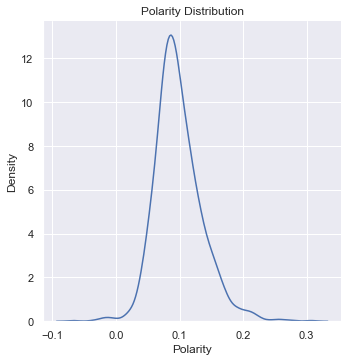

In [29]:
sns.set(rc = {'figure.figsize':(12,8)})

sns.displot(data=sentiment_df1, x='Polarity', kind="kde")
plt.title('Polarity Distribution')
plt.show()

The subjectivity score distribution also appears to be near normal with a mean close to 0.4, showing that most data values are both Balanced and Objective.

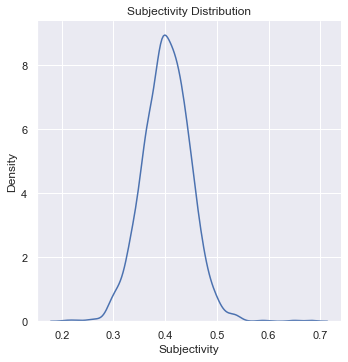

In [30]:
sns.displot(data=sentiment_df1, x='Subjectivity', kind="kde")
plt.title('Subjectivity Distribution')
plt.show()

#### Polarity

#### Polarity vs. Voting Action

We found that polarity score is about equal across all the group in `action`. Though it should be noted that 'increase' and 'no change' have a fair amount of variablity.

<AxesSubplot:xlabel='action', ylabel='Polarity'>

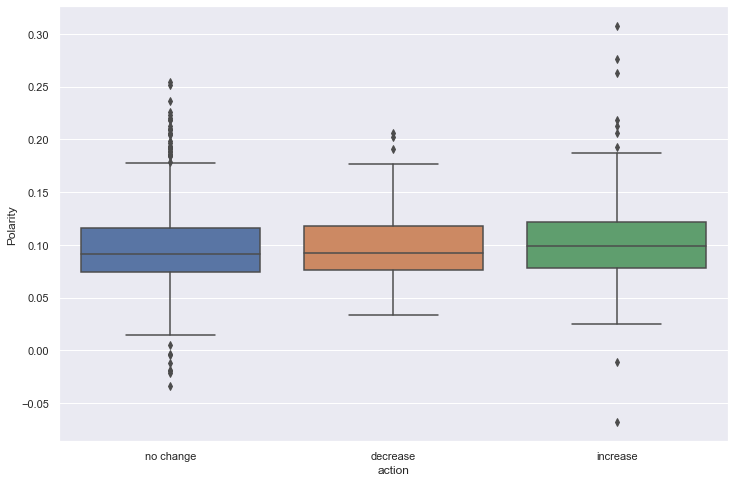

In [31]:
sns.boxplot(x="action", y="Polarity", data=sentiment_df1)

In [32]:
sentiment_df1.groupby('action')['Polarity'].mean()

action
decrease     0.098589
increase     0.102266
no change    0.096899
Name: Polarity, dtype: float64

#### Polarity vs. Federal Chair Member

The speeches under the federal chairs' sentiment score is displayed below. Alan Greenspan and Ben Bernanke display similar sentiment scores throughout their terms. Janet Yellen has a tightest spread of sentiment score compared to her counterparts. Jerome Powell has the highest general sentiment score across all speeches.

In [33]:
sentiment_df1.groupby('fed_chair')['Polarity'].mean()

fed_chair
Alan Greenspan    0.097449
Ben Bernanke      0.096672
Janet Yellen      0.093155
Jerome Powell     0.112795
Name: Polarity, dtype: float64

<AxesSubplot:xlabel='fed_chair', ylabel='Polarity'>

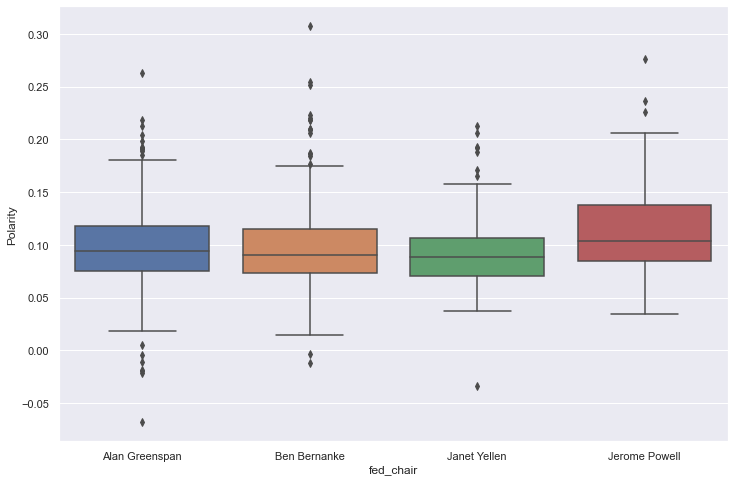

In [34]:
sns.boxplot(x="fed_chair", y="Polarity", data=sentiment_df1)

#### Subjectivity

#### Subjectivity vs.  Voting Action

The subjectivity score appears to be equal across the voting decision actions. Interestingly the `action`, 'decrease', contributed to 100% of the subjective speeches. 

<AxesSubplot:xlabel='action', ylabel='Subjectivity'>

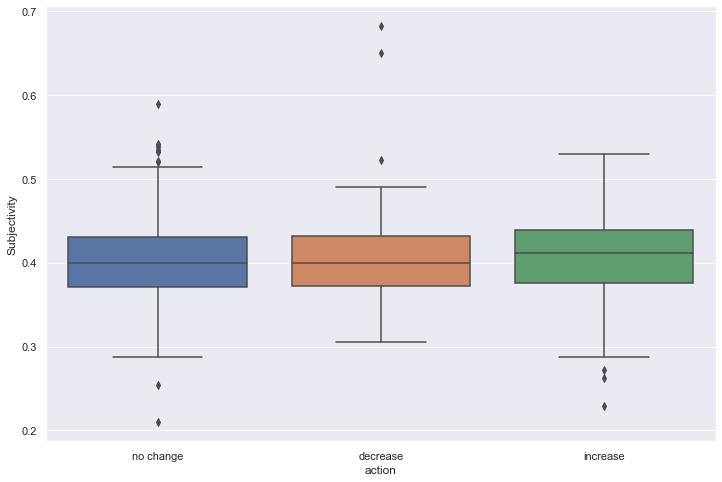

In [35]:
sns.boxplot(x="action", y="Subjectivity", data=sentiment_df1)

In [36]:
sentiment_df1.groupby('action')['Subjectivity'].mean()

action
decrease     0.404198
increase     0.408159
no change    0.400725
Name: Subjectivity, dtype: float64

#### Subjectivity vs. Federal Chair Member

The federal chair members' subjectivity score appears to be slightly different between the chair members. Alan Greenspan had the most subjective speeches, followed by Ben Bernanke, then Janet Yellen, and finally Jerme Powell with the most objective speeches. Greenspan also had the only two extremely subjective speeches.  

<AxesSubplot:xlabel='fed_chair', ylabel='Subjectivity'>

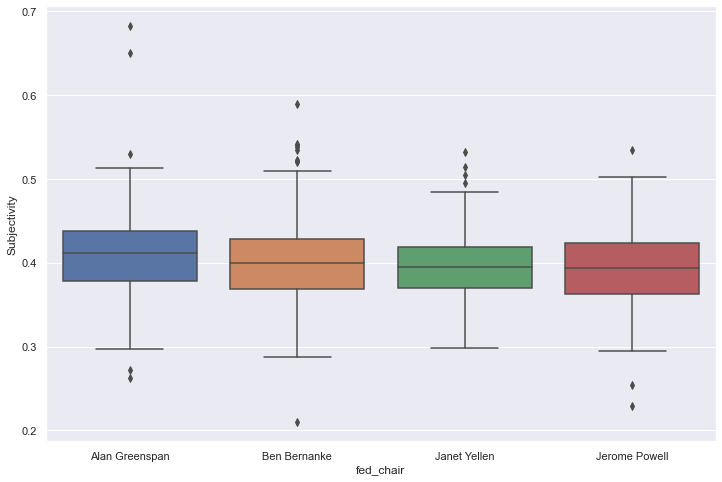

In [37]:
sns.boxplot(x="fed_chair", y="Subjectivity", data=sentiment_df1)

In [38]:
sentiment_df1.groupby('fed_chair')['Subjectivity'].mean()

fed_chair
Alan Greenspan    0.408625
Ben Bernanke      0.399342
Janet Yellen      0.398146
Jerome Powell     0.393967
Name: Subjectivity, dtype: float64

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

fin_data = pd.DataFrame(sentiment_df[['text', 'filter_text']])
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
fin_data['VaderSentiment'] = fin_data['filter_text'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    

fin_data['VaderAnalysis'] = fin_data['VaderSentiment'].apply(vader_analysis)
fin_data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ericl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,filter_text,VaderSentiment,VaderAnalysis
0,"remarks by governor edward w. kelley, jr. deve...","remark governor edward w. kelley, jr. developm...",0.9997,Positive
1,remarks by chairman alan greenspan bank superv...,remark bank supervision world economy internat...,0.9995,Positive
2,remarks by chairman alan greenspan regulation ...,remark regulation electronic payment system u....,0.9993,Positive
3,monetary policy objectives and strategy i wan...,monetary policy objective strategy want share ...,0.9980,Positive
4,the future of electronic payments i am del...,future electronic payment delighted morning di...,0.9995,Positive


In [16]:
vader_counts = fin_data['VaderAnalysis'].value_counts()
vader_counts

Positive    1382
Negative      60
Neutral        5
Name: VaderAnalysis, dtype: int64

In [17]:
sentiment_df = sentiment_df.merge(fin_data, how='inner')

In [18]:
greenspan_sentiment = sentiment_df[sentiment_df['fed_chair'] == 'Alan Greenspan']
ben_sentiment = sentiment_df[sentiment_df['fed_chair'] == 'Ben Bernanke']
yellen_sentiment = sentiment_df[sentiment_df['fed_chair'] == 'Janet Yellen']
powell_sentiment = sentiment_df[sentiment_df['fed_chair'] == 'Jerome Powell']

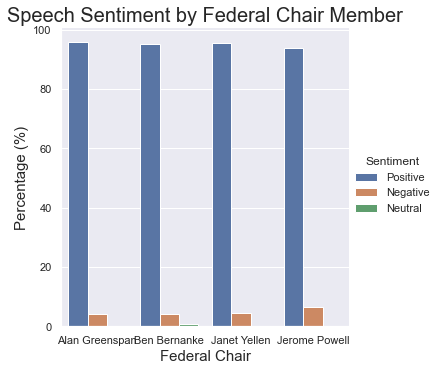

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,8)})
fig = (sentiment_df
.groupby('fed_chair')['VaderAnalysis']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='fed_chair',y='percent',hue='VaderAnalysis',kind='bar'))

plt.title("Speech Sentiment by Federal Chair Member", fontsize=20)
fig._legend.set_title("Sentiment")
plt.xlabel("Federal Chair", fontsize=15)
plt.ylabel("Percentage (%)", fontsize=15)
plt.show()

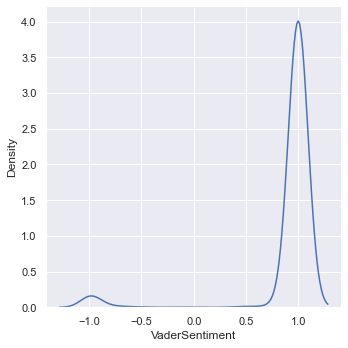

In [20]:
sns.displot(data=sentiment_df, x='VaderSentiment', kind="kde")
plt.show()

<AxesSubplot:xlabel='action', ylabel='VaderSentiment'>

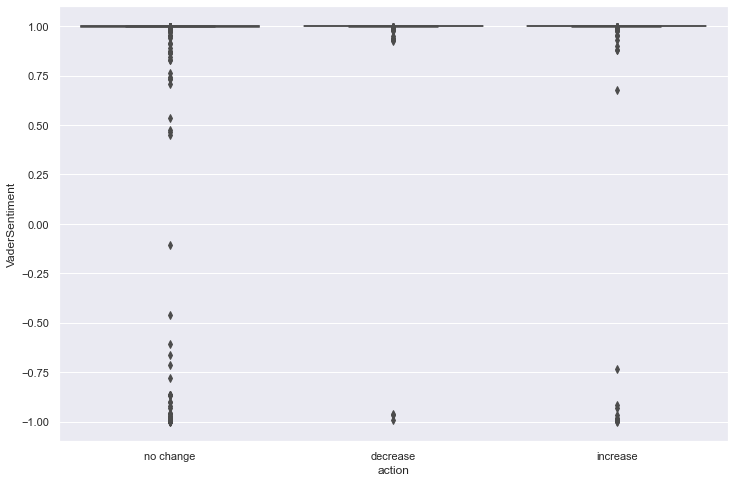

In [21]:
# polarity vs decision boxplot

sns.boxplot(x="action", y="VaderSentiment", data=sentiment_df)

In [25]:
sentiment_df.groupby('fed_chair')['VaderSentiment'].mean()

fed_chair
Alan Greenspan    0.917838
Ben Bernanke      0.904435
Janet Yellen      0.909794
Jerome Powell     0.868940
Name: VaderSentiment, dtype: float64

In [26]:
sentiment_df.groupby('action')['VaderSentiment'].mean()

action
decrease     0.968814
increase     0.916279
no change    0.890633
Name: VaderSentiment, dtype: float64